In [ ]:
import sys
sys.path.append("../src")

%load_ext autoreload
%autoreload 2

import torch
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt
import numpy as np

In [2]:
from data_loader import get_data_loaders
from model import get_resnet18
from train import train_model
from evaluate import evaluate_model
from grad_cam import GradCAM
from utils import save_model, load_model, predict_image

In [9]:
from data_loader import get_data_loaders
dataloaders = get_data_loaders('../dataset', batch_size=32)

In [ ]:
import os

DATASET_PATH = '../dataset'

train_path = os.path.join(DATASET_PATH, 'train')
if not os.path.exists(train_path):
    print(f"❌ Train folder not found at {train_path}")
else:
    print(f"✅ Train folder found. Contents:")
    print(os.listdir(train_path))

✅ Train folder found. Contents:
['glioma', 'meningioma', 'notumor', 'pituitary']


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-2.117904..2.64].


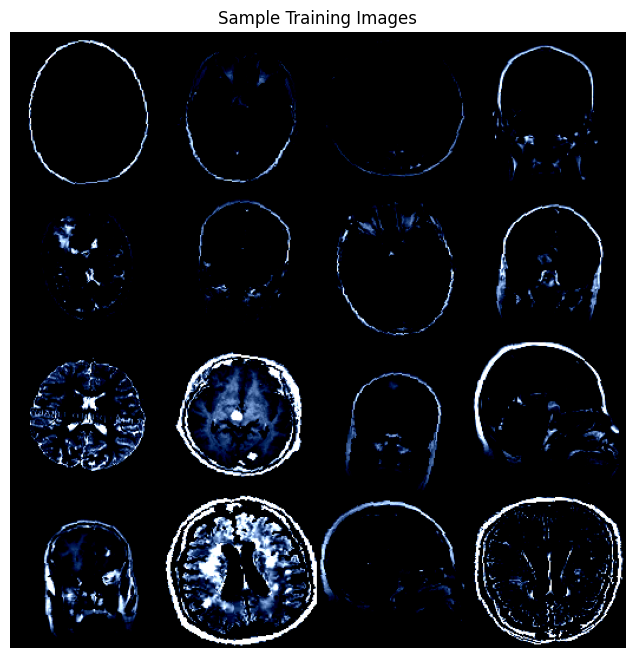

In [10]:
import matplotlib.pyplot as plt
from torchvision.utils import make_grid

images, labels = next(iter(dataloaders['train']))
grid = make_grid(images[:16], nrow=4)
plt.figure(figsize=(8, 8))
plt.imshow(grid.permute(1, 2, 0))
plt.title("Sample Training Images")
plt.axis('off')
plt.show()